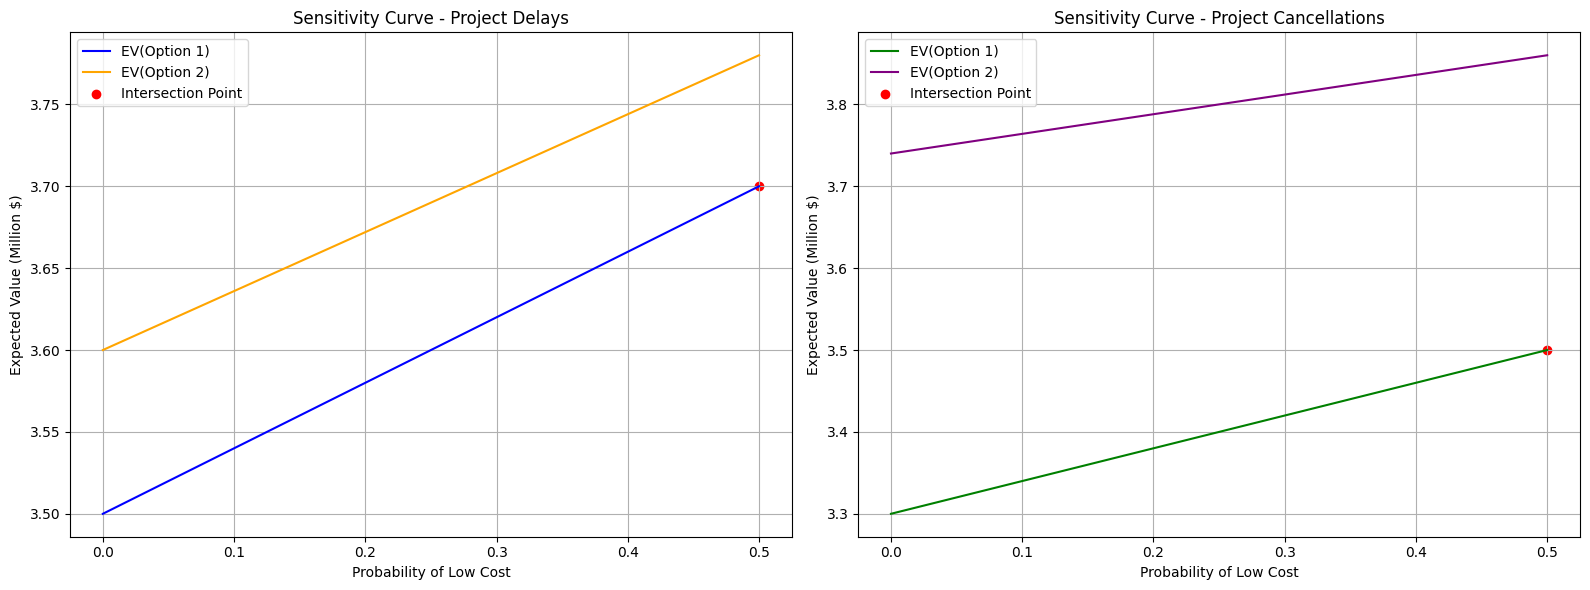

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# === PAYOFFS ===

# For Project Delays
payoffs_d1 = [3.80, 3.60, 3.40]  # Option 1: Inventory & Supplier Diversification
payoffs_d2 = [3.88, 3.68, 3.52]  # Option 2: Training & Development of Workers

# For Project Cancellations
payoffs_c1 = [3.60, 3.40, 3.20]  # Option 1: Contingency Financing
payoffs_c2 = [3.92, 3.80, 3.68]  # Option 2: Up-Front Planning

# === SETUP ===

# We'll vary probability of Low Cost from 0 to 0.5
p_medium = 0.5
p_low_range = np.linspace(0, 0.5, 100)

# === EV CALCULATION FOR DELAYS ===

ev_d1, ev_d2 = [], []

for p_low in p_low_range:
    p_high = 1 - p_low - p_medium
    if p_high < 0 or p_high > 1:
        ev_d1.append(None)
        ev_d2.append(None)
        continue
    ev1 = p_low * payoffs_d1[0] + p_medium * payoffs_d1[1] + p_high * payoffs_d1[2]
    ev2 = p_low * payoffs_d2[0] + p_medium * payoffs_d2[1] + p_high * payoffs_d2[2]
    ev_d1.append(ev1)
    ev_d2.append(ev2)

ev_d1 = np.array(ev_d1, dtype=np.float64)
ev_d2 = np.array(ev_d2, dtype=np.float64)

# Intersection for delays
diff = np.abs(ev_d1 - ev_d2)
min_diff_index = np.nanargmin(diff)
intersection_p = p_low_range[min_diff_index]
intersection_ev = ev_d1[min_diff_index]

# === EV CALCULATION FOR CANCELLATIONS ===

ev_c1, ev_c2 = [], []

for p_low in p_low_range:
    p_high = 1 - p_low - p_medium
    if p_high < 0 or p_high > 1:
        ev_c1.append(None)
        ev_c2.append(None)
        continue
    ev1 = p_low * payoffs_c1[0] + p_medium * payoffs_c1[1] + p_high * payoffs_c1[2]
    ev2 = p_low * payoffs_c2[0] + p_medium * payoffs_c2[1] + p_high * payoffs_c2[2]
    ev_c1.append(ev1)
    ev_c2.append(ev2)

ev_c1 = np.array(ev_c1, dtype=np.float64)
ev_c2 = np.array(ev_c2, dtype=np.float64)

# Intersection for cancellations
diff_c = np.abs(ev_c1 - ev_c2)
min_diff_index_c = np.nanargmin(diff_c)
intersection_p_c = p_low_range[min_diff_index_c]
intersection_ev_c = ev_c1[min_diff_index_c]

# === PLOTTING ===

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Project Delays
axs[0].plot(p_low_range, ev_d1, label='EV(Option 1)', color='blue')
axs[0].plot(p_low_range, ev_d2, label='EV(Option 2)', color='orange')
axs[0].scatter(intersection_p, intersection_ev, color='red', label='Intersection Point')
axs[0].set_title('Sensitivity Curve - Project Delays')
axs[0].set_xlabel('Probability of Low Cost')
axs[0].set_ylabel('Expected Value (Million $)')
axs[0].legend()
axs[0].grid(True)

# Project Cancellations
axs[1].plot(p_low_range, ev_c1, label='EV(Option 1)', color='green')
axs[1].plot(p_low_range, ev_c2, label='EV(Option 2)', color='purple')
axs[1].scatter(intersection_p_c, intersection_ev_c, color='red', label='Intersection Point')
axs[1].set_title('Sensitivity Curve - Project Cancellations')
axs[1].set_xlabel('Probability of Low Cost')
axs[1].set_ylabel('Expected Value (Million $)')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()
